In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df=pd.read_csv("/Users/kanchiharinathbadrinath/Downloads/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.shape

(1338, 7)

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

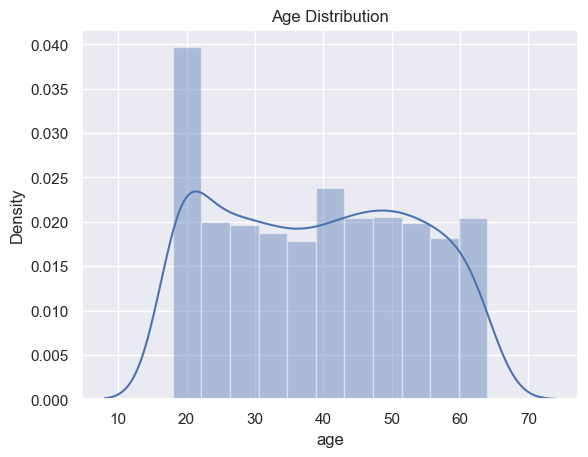

In [14]:
import warnings

warnings.filterwarnings("ignore")


sns.set()
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

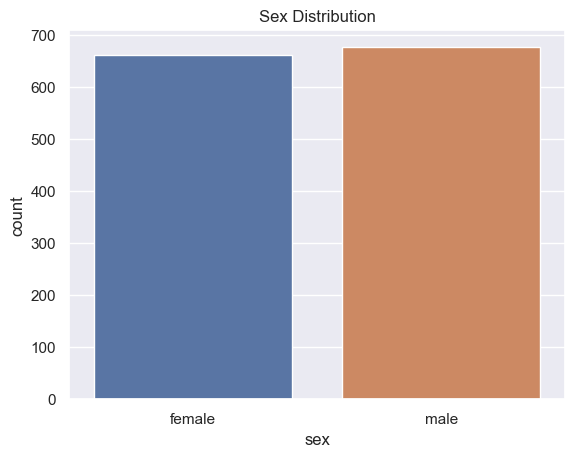

In [15]:
sns.countplot(df['sex'])
plt.title('Sex Distribution')
plt.show()

In [16]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

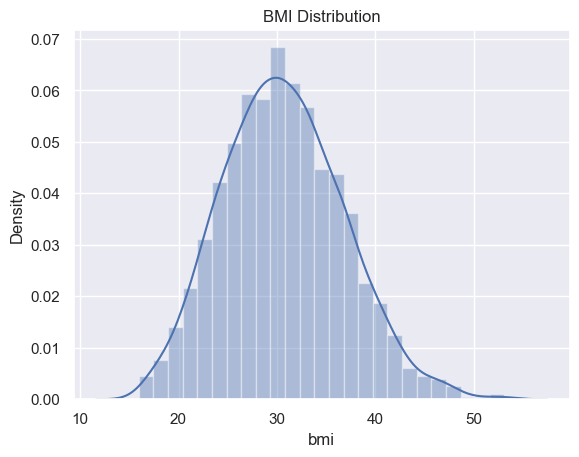

In [17]:
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

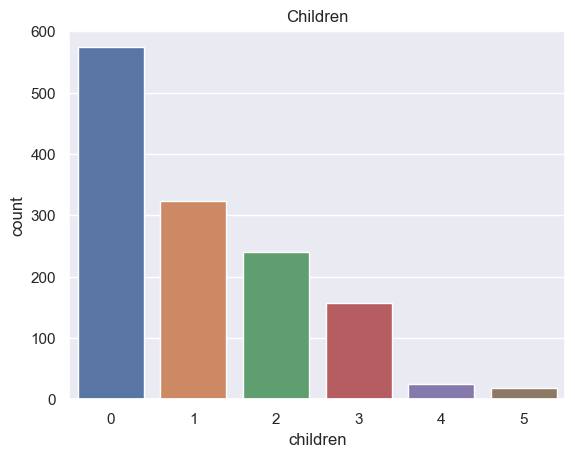

In [18]:
sns.countplot(df['children'])
plt.title('Children')
plt.show()

In [19]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

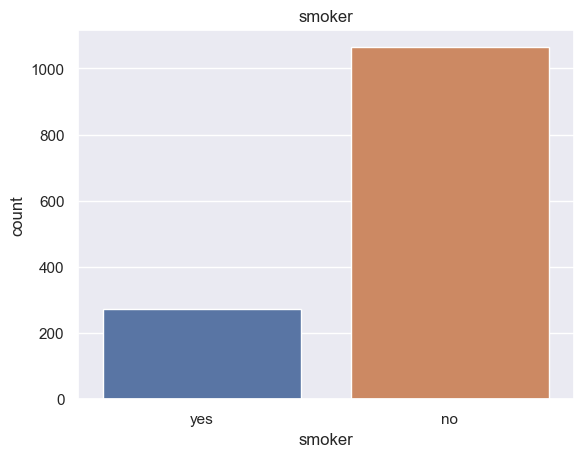

In [20]:
sns.countplot(df['smoker'])
plt.title('smoker')
plt.show()

In [21]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

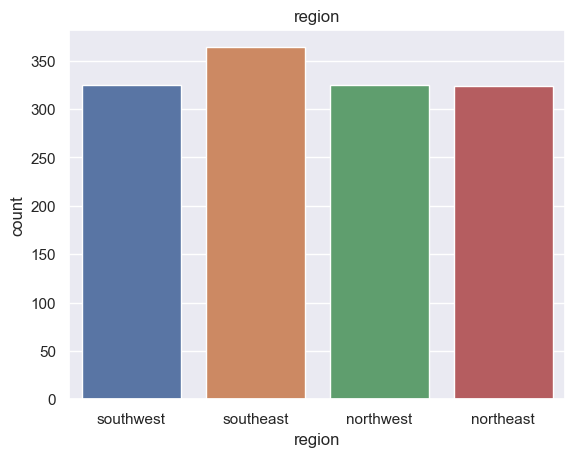

In [22]:
sns.countplot(df['region'])
plt.title('region')
plt.show()

In [23]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [24]:
df.replace({'sex':{'male':0,'female':1}},inplace= True)

In [25]:
df.replace({'smoker':{'yes':0,'no':1}},inplace= True)

In [26]:
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace= True)

In [27]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [28]:
x= df.drop(columns = 'charges',axis =1)

In [29]:
y = df['charges']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.5,random_state = 7)

In [32]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (669, 6) (669, 6)


In [33]:
print(y.shape,y_train.shape,y_test.shape)

(1338,) (669,) (669,)


In [36]:
lr = LinearRegression()

In [37]:
lr.fit(x_train,y_train)

LinearRegression()

In [39]:
training_data_prediction = lr.predict(x_train)

In [40]:
r2_train = metrics.r2_score(y_train,training_data_prediction)

In [41]:
print(r2_train)

0.7344777573336272


In [42]:
test_data_prediction = lr.predict(x_test)

In [43]:
r2_test = metrics.r2_score(y_test,test_data_prediction)

In [44]:
print(r2_test)

0.7594775475523561
